In [1]:
#Pkg.add("Optim")
#Pkg.add("PyPlot")

using Pkg
using Optim
using PyPlot
using LinearAlgebra

In [2]:
f(x) = (x[1]-5)^2

res = optimize(f,[1.],Newton())
fieldnames(typeof(res))

(:method, :initial_x, :minimizer, :minimum, :iterations, :iteration_converged, :x_converged, :x_tol, :x_abschange, :f_converged, :f_tol, :f_abschange, :g_converged, :g_tol, :g_residual, :f_increased, :trace, :f_calls, :g_calls, :h_calls)

In [58]:
X = [1, 2, 3, 4, 5]
L = 3

function ma(x,l)
    N= length(x)
    h = zeros( N - l + 1, N)
    for i =1:(N-l+1)
        h[i,i:i+l-1] = 1/l*ones(l)
    end
    return h*x
end


print(ma(X,1))

[1.0, 2.0, 3.0, 4.0, 5.0]

In [46]:
function no_win(p,g)
    l = length(p)
    gs = reverse(g(p))
    result = ones(l)
    for i = 2:l
        for j=i:l
            result[i-1] = result[i-1]*gs[j]
        end
    end
    return reverse(result)
end


function create_obj(u,g)
    obj(p) = -1*u(p,g)
    return obj
end


f1(p) = clamp!(p,0, 1)
u1(p,g) = sum(p.*(ones(size(p)) - g(p)).*no_win(p,g))

P = [.5,.5,.5]
res = optimize(create_obj(u1,f1),[.5,.5,.5])

println(res.minimizer)
println(no_win(res.minimizer,f1))
println(f1(res.minimizer))

[0.695226, 0.625048, 0.499877]
[1.0, 0.695226, 0.43455]
[0.695226, 0.625048, 0.499877]


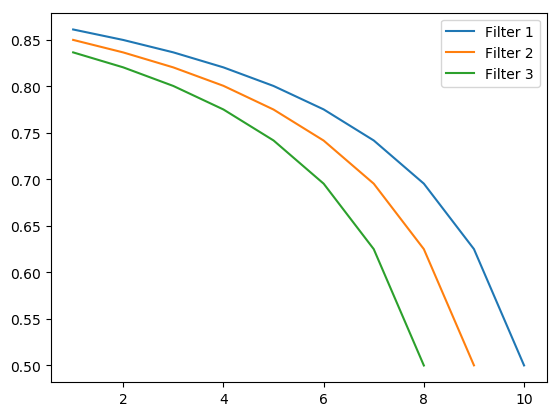

In [118]:
function create_plot(n,l,u,g)
    p0 = .5*ones(n)
    for i=1:l
        obj(p) = create_obj(u,g)(p)
        obj_avg(p) = obj(ma(p,i))
        res = optimize(obj_avg,p0)
        ps = ma(res.minimizer,i)
        xs = collect(1:length(ps))
        plot(xs, ps, label="Filter $(i)")
    end
    legend()
    show()
end


f1(p) = clamp!(p,0, 1)
u1(p,g) = sum(p.*(ones(size(p)) - g(p)).*no_win(p,g))
create_plot(10,3,u1,f1)

In [47]:
function update_beliefs(p,g)
    l = length(p)
    gs = g(p)
    result = gs[:]
    for i = 2:l
        result[i] = Int( p[i] < minimum(p[1:i-1]) )*result[i]/gs[i-1]
    end
    return result[:]
end


P = [.7, .6, .5]

function create_obj(u,g)
    obj(p) = -1*u(p,g)
    return obj
end



f1(p) = clamp!(p,0, 1)
u2(p,g) = sum(p .*(ones(size(p))- update_beliefs(p,g)))


res2 = optimize(create_obj(u2,f1),[7.,4.,0.])
println(res2.minimizer)
println(obj2(res2.minimizer))
println(update_beliefs(res2.minimizer,f1))
println(f1(res2.minimizer))

[1.0, 1.0, 0.000355393]
-1.0003552666188296
[1.0, 0.0, 0.000355393]
[1.0, 1.0, 0.000355393]
